# Data Processing in Python
Python è ormai considerato il linguaggio di programmazione standard della Data Science. Uno dei motivi che lo hanno portato ad essere tale è anche la presenza della libreria Pandas: quest'ultima permette in pochissime righe di codice di performare pressochè qualsiasi operazione su dei dati.

Quando viene iniziato un progetto di Data Science, la prima cosa che si fa è, generalmente, ispezionare i dati: importarli, riorganizzarli in modo da renderli pronti per i modelli, fare dei grafici e conteggiare anomalie o valori mancanti al loro interno.

In questo esercizio metteremo le mani su un vero dataset (qui le trovate informazioni riguardo al dataset e la sua struttura, leggete con cura: https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv): vi performeremo varie operazioni, dove però vi imporrò talvolta dei vincoli sul numero di righe di codice massimo che potete scrivere, l'obiettivo dell'esercizio è infatti quello di mostrare come Pandas abbia un comando per pressoché qualsiasi operazione.

Due file .csv sono già nella stessa cartella di questo notebook: "anime.csv" e "rating.csv", scaricate tutto quanto e mettete tutto nella stessa cartella in locale.

IMPORTANTE: l'utilizzo delle librerie in Python è talvolta molto intricato e nessuno è in grado di programmare ciecamente usando una libreria. Il consiglio che vi do, valido per questo notebook ma più in generale ogni qualvolta programmerete qualcosa, è quello di cercare su internet qualcuno che abbia già fatto la stessa identica cosa che dovete fare voi. Non abbiate paura di andarvi a scrivere letteralmente su Google cose tipo "pandas how to do etc. etc.", nel 95% dei casi troverete esattamente ciò che stavate cercando, altrimenti qualcosa di simile che potrete riadattare da soli cercando nella documentazione come funzionano i comandi che vi interessano.

In [93]:
### qui potete importare tutte le librerie che vi servono
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [46]:
# Importare i dataset (2 righe)
anime = pd.read_csv('anime.csv', header = 0)
rating = pd.read_csv('rating.csv', header = 0)

In [47]:
# Visualizzare una parte di ognuno dei due dataset (2 righe)
anime.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [48]:
anime.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [49]:
rating.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [50]:
rating.tail(5)

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


In [51]:
# Scegliere ed impostare un indice adeguato per il dataframe "anime" (1 riga)
anime = anime.set_index('anime_id')

In [52]:
# Ad ora il dataframe "anime" è ordinato in base al rating (decreasing). Ordinare il dataframe alfabeticamente in base al "name"
# (1 riga)
anime.sort_values(by = ['name'], inplace = True)
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
20707,&quot;0&quot;,Music,Music,1,5.06,1170
25627,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,Kids,Movie,1,5.00,113
7669,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,"Comedy, Fantasy, School",OVA,1,7.06,14351
8481,&quot;Bungaku Shoujo&quot; Memoire,"Drama, Romance, School",OVA,3,7.54,18013
6408,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",Movie,1,7.63,40984


In [53]:
# Ci sono degli anime il cui nome non è stato correttamente encodato, rimuovere dal dataframe tutti gli anime il cui nome 
# inizia con '.' oppure '&' (1 riga)
anime = anime.loc[-anime['name'].str.startswith(tuple(['&', '.'])),:]
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37
29978,001,Comedy,ONA,1,4.00,916
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198


In [54]:
# Contare quanti Missing Values (NaN) ci sono in ogni colonna dei due dataframe (2 righe)
num_nan_anime = anime.isna().sum()
num_nan_rating = np.sum(rating['rating'] == -1)
print(num_nan_anime,'\n-1 ratings: ', num_nan_rating)

name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64 
-1 ratings:  1476496


In [64]:
# Rimuovere tutti i Nan dal dataframe "anime" (1 riga)
anime = anime.dropna()

In [60]:
# Rimuovere tutti i rating -1 dal dataframe "rating" (1 riga)
rating = rating[rating['rating'] != -1]
rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [67]:
# Adesso il nostro intento è utilizzare il dataframe "rating" per arricchire le informazioni contenute in "anime":
# osservare bene la struttura dei due dataframe, sebbene il rating medio per ogni anime sia già incluso nel dataframe, 
# siamo ora interessati alla deviazione standard del rating.

# Creare un dataframe che abbia come indice l'id di un anime e una colonna con all'interno la deviazione standard
# dei suoi ratings (1 riga)
std_rat = rating.groupby('anime_id')[['rating']].aggregate(np.std)
std_rat.tail()

,rating
anime_id,
34324,1.375103
34325,1.397276
34349,1.000000
34367,0.957427
34475,2.081666


In [68]:
# Unire al dataframe "anime" la colonna contenente le deviazioni standard dei rating: attenzione, questa deve essere ovviamente
# coerente con gli indici "anime_id". Quindi sostituire tutti i Nan che possono essersi generati (potremmo avere
# un anime senza alcun voto, oppure con uno solo, quindi deviazione standard Nan) con degli 0. Procedere infine a rimuovere qualsiasi colonna
# "doppione" possa essersi generate dalla prima operazione (massimo 2 righe).
anime = pd.merge(anime, std_rat, on = 'anime_id')
anime.fillna(0, inplace = True)
anime

,name,genre,type,episodes,rating_x,members,rating_y,rating
anime_id,,,,,,,,
29978,001,Comedy,ONA,1,4.00,916,3.465705,3.465705
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307,1.675079,1.675079
1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12,6.39,11097,1.497141,1.497141
3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1,6.44,2988,1.393985,1.393985
28761,00:08,Dementia,Movie,1,5.21,2386,2.150530,2.150530
...,...,...,...,...,...,...,...,...
3091,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,13,8.34,74941,1.178987,1.178987
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547,1.232423,1.232423
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353,1.245483,1.245483


In [69]:
# Prima di procedere oltre ispezioniamo quali tipo di variabile Pandas ha assegnato (autonomamente) ad ogni colonna,
# stampare il tipo di ogni colonna di "anime" (1 riga)
anime.dtypes

name         object
genre        object
type         object
episodes     object
rating_x    float64
members       int64
rating_y    float64
rating      float64
dtype: object

In [71]:
# Il tipo object è usato per le stringhe, una colonna in particolare ha un tipo assegnato che forse non è quello più corretto.
# Ispezionare tutti i possibili valori che può assumere quella colonna e trovare il motivo per cui è stata assegnata con quel 
# tipo da pandas (1 riga)
anime['episodes'].unique()

array(['1', '12', '25', '2', '13', '8', '4', '3', '39', '35', '6', '15',
       '11', '7', '23', '5', '24', '48', '22', '10', '26', '51', '50',
       '178', '27', '42', '52', '31', '74', '53', '28', '43', '20', '58',
       '38', '37', '44', '54', '47', '79', '330', '104', '49', '117',
       '14', '46', '18', '45', '29', '21', '60', '16', '59', '75', '34',
       '61', '17', '366', '76', 'Unknown', '115', '128', '70', '65', '33',
       '73', '365', '180', '41', '142', '78', '170', '40', '156', '63',
       '9', '305', '151', '66', '103', '30', '163', '1787', '243', '153',
       '64', '97', '291', '100', '56', '119', '145', '175', '102', '36',
       '19', '77', '199', '108', '114', '68', '110', '113', '201', '32',
       '225', '164', '101', '140', '130', '86', '94', '1428', '109',
       '260', '62', '148', '296', '127', '312', '167', '240', '300',
       '105', '195', '203', '358', '137', '1565', '331', '373', '91',
       '55', '150', '773', '182', '155', '87', '88', '95', '96',

In [74]:
# Una volta trovato l'elemento di disturbo, rimuovere le righe del dataframe che presentano quel valore in quella colonna
# e cambiare il tipo della colonna con quello più appropriato (2 righe)
anime = anime[anime['episodes'] != 'Unknown']
anime['episodes'] = anime['episodes'].astype(np.int64)

In [76]:
# Adesso siamo interessati a fare una piccola analisi suddividendo la variabile "type".
# Fare il conteggio di quanti anime ci sono per ogni tipo (1 riga)
cnt = anime.groupby('type').count()
# Calcolare il rating medio per ognuno di questi tipi (1 riga)
avg_rat_type = anime.groupby('type')[['rating_x']].aggregate(np.mean)
# Calcolare il numero di episodi medio per ognuno di questi tipi (1 riga)
avg_ep_type = anime.groupby('type')[['episodes']].aggregate(np.mean)
# Calcolare il numero di utenti totale per ognuno di questi tipi (1 riga)
tot_mem_type = anime.groupby('type')[['members']].aggregate(sum)
print("Number of anime per type: {}".format(cnt))
print("Average Rating per type: {}".format(avg_rat_type))
print("Average number of Episodes per type: {}".format(avg_ep_type))
print("Total number of Members per type: {}".format(tot_mem_type))

Number of anime per type:          name  genre  episodes  rating_x  members  rating_y  rating
type                                                               
Movie    1722   1722      1722      1722     1722      1722    1722
Music     444    444       444       444      444       444     444
ONA       475    475       475       475      475       475     475
OVA      2723   2723      2723      2723     2723      2723    2723
Special  1440   1440      1440      1440     1440      1440    1440
TV       3065   3065      3065      3065     3065      3065    3065
Average Rating per type:          rating_x
type             
Movie    6.504872
Music    5.647838
ONA      5.712421
OVA      6.407113
Special  6.646056
TV       7.054065
Average number of Episodes per type:           episodes
type              
Movie     1.041231
Music     1.092342
ONA       5.696842
OVA       2.510834
Special   2.679167
TV       35.448613
Total number of Members per type:            members
type              


In [80]:
# Adesso siamo interessati a studiare i generi ("genre") degli anime. La prima cosa da fare è un "parsing" della colonna genre.
# In particolare, proveremo adesso a cambiare la struttura del dataframe, calcolando innanzitutto quanti differenti generi ci
# sono in totale, e aggiungendo quindi una colonna per ogni genere al dataframe dal contenuto binario: 1 se l'anime in quella 
# riga contiene quel genere tra i suoi e 0 altrimenti. Questa struttura ci faciliterà in alcune analisi e sostituira la colonna 
# 'genre' che è altrimenti di difficile utilizzo.

# Ottenere il conteggio delle apparizioni di tutti i differenti generi possibili (si può fare una riga ma è hardcore,
# comunque non più di 4-5 righe)

genres_count = pd.Series(anime['genre'].str.split(', ').map(Counter).sum())
print(genres_count)
# (per chi vuole provarlo a fare in una sola riga, io ho utilizzato un Counter e i metodi delle liste join, split e replace)

Comedy           3782
Action           2519
Adventure        1963
Mecha             869
Sci-Fi           1863
Seinen            484
Dementia          192
Demons            268
Fantasy          1849
Magic             682
Military          401
Shoujo            543
Ecchi             607
Harem             306
Romance          1383
Drama            1650
Mystery           453
Space             338
Super Power       409
Supernatural      931
Kids              794
School           1081
Hentai           1080
Shounen          1546
Music             727
Slice of Life     980
Parody            332
Horror            327
Sports            427
Historical        578
Police            177
Psychological     217
Thriller           82
Martial Arts      230
Game              137
Samurai           127
Yaoi               37
Yuri               41
Shoujo Ai          54
Josei              50
Shounen Ai         60
Vampire            96
Cars               54
dtype: int64


In [89]:
# Adesso aggiungere al dataframe una colonna per ogni genere contenenti labels binarie (1-0 oppure True-False).
# Anche qui, si può fare tutto in una riga ma è davvero intricato, usando il comando join di pandas e il metodo contains delle stringhe.
# Comunque non ci vogliono più di 4-5 righe.
anime = pd.concat([anime, pd.DataFrame(columns = genres_count.index.tolist())])
for i in genres_count.index.tolist():
    anime[i] = anime.apply( lambda row: True if i in row['genre'] else False, axis = 1)
anime

,name,genre,type,episodes,rating_x,members,rating_y,rating,Comedy,Action,...,Martial Arts,Game,Samurai,Yaoi,Yuri,Shoujo Ai,Josei,Shounen Ai,Vampire,Cars
29978,001,Comedy,ONA,1.0,4.00,916.0,3.465705,3.465705,True,False,...,False,False,False,False,False,False,False,False,False,False
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1.0,6.76,8307.0,1.675079,1.675079,False,True,...,False,False,False,False,False,False,False,False,False,False
1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12.0,6.39,11097.0,1.497141,1.497141,False,True,...,False,False,False,False,False,False,False,False,False,False
3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1.0,6.44,2988.0,1.393985,1.393985,False,True,...,False,False,False,False,False,False,False,False,False,False
28761,00:08,Dementia,Movie,1.0,5.21,2386.0,2.150530,2.150530,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,13.0,8.34,74941.0,1.178987,1.178987,True,False,...,False,False,False,False,False,False,False,False,False,False
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1.0,8.04,41547.0,1.232423,1.232423,True,False,...,False,False,False,False,False,False,False,False,False,False
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2.0,8.32,36353.0,1.245483,1.245483,False,False,...,False,False,False,False,False,False,False,False,False,False
4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2.0,8.17,40401.0,1.163962,1.163962,True,False,...,False,False,False,False,False,False,False,False,False,False


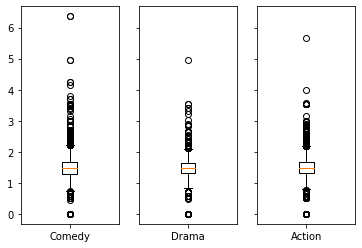

In [102]:
# L'ultima richiesta che vi farò è quella di creare dei plot descrittivi (con matplotlib) dei dati, in particolare:
# 1) scegliete tre generi e plottate in una unica riga, allineati, i boxplot che descrivono la distribuzione dei loro ratings
# 2) create un pie chart per i generi
# 3) plottate in un unico grafico, uno dopo l'altro, la media dei ratings per ogni genere, la media meno la deviazione standard
# e la media più la deviazione standard, in modo da avere per ogni genere una sorta di intervallo di confidenza per i ratings

comedies = anime[anime['Comedy'] == True]
dramas = anime[anime['Drama'] == True]
actions = anime[anime['Action'] == True]
com_list = comedies['rating'].tolist()
d_list = dramas['rating'].tolist()
ac_list = actions['rating'].tolist()

fig, axs = plt.subplots(1, 3, sharey = True)
axs[0].boxplot(com_list, labels=['Comedy'])
axs[1].boxplot(d_list, labels=['Drama'])
axs[2].boxplot(ac_list, labels=['Action'])

plt.show()

([<matplotlib.patches.Wedge at 0x1d000144070>,
 [Text(1.0187777629028842, 0.4148395711773345, 'Comedy'),
  Text(0.565413548027242, 0.9435610842479919, 'Action'),
  Text(0.08965149325780405, 1.0963405537316615, 'Adventure'),
  Text(-0.2271184175081395, 1.076297925496746, 'Mecha'),
  Text(-0.5150676588570722, 0.9719595191156343, 'Sci-Fi'),
  Text(-0.7313174529412163, 0.8216901989336199, 'Seinen'),
  Text(-0.7863195842593088, 0.7692213669745972, 'Dementia'),
  Text(-0.8216154073168482, 0.7314014783000987, 'Demons'),
  Text(-0.9595243300208924, 0.5378782948752976, 'Fantasy'),
  Text(-1.0652196043586244, 0.2744215634567659, 'Magic'),
  Text(-1.0890207929276048, 0.15502810252122443, 'Military'),
  Text(-1.0988920848097774, 0.04935773437285329, 'Shoujo'),
  Text(-1.0970946510625976, -0.07989572335136247, 'Ecchi'),
  Text(-1.0848705079863148, -0.18181303831550547, 'Harem'),
  Text(-1.0374918627422898, -0.3655278850423509, 'Romance'),
  Text(-0.8764575421955593, -0.6646970563561416, 'Drama'),
 

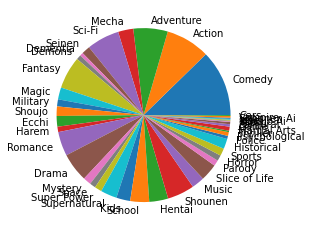

In [109]:
plt.pie(genres_count.tolist(), labels = genres_count.index.tolist())

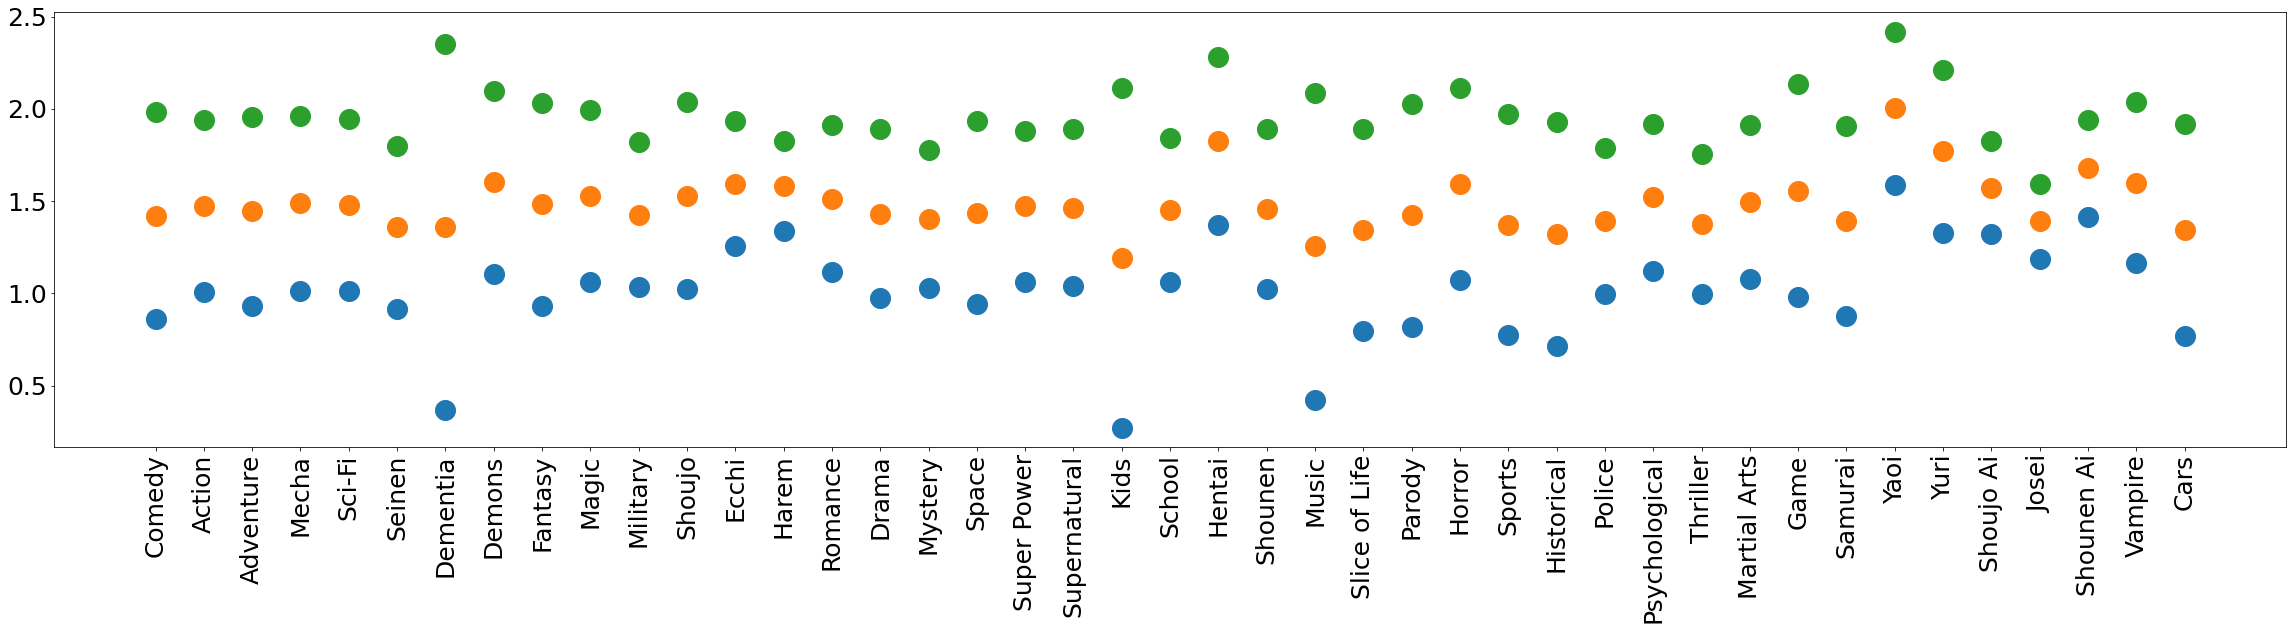

In [129]:
x = genres_count.index.tolist()
g_rats = []
y = []
for i in x:
    temp = anime[anime[i] == True]
    g_rats.append(temp['rating'].tolist())
    y.append([np.mean(g_rats[-1])-np.std(g_rats[-1]), np.mean(g_rats[-1]), np.mean(g_rats[-1])+np.std(g_rats[-1])])
    
fig, axs = plt.subplots(1,1, figsize=(40,8))
axs.plot(x, y, 'o', markersize = 20)

plt.xticks(fontsize = 25, rotation = 90)
plt.yticks(fontsize = 25)
plt.show()

In [ ]:
# ANALISI LIBERA
# Adesso le possibilità sono pressoché infinite, potete studiare settorialmente i generi, i type, le distribuzioni dei rating 
# nelle varie sottofamiglie, etc.
# Questo è un ottimo dataset per esercitarsi a gestire feature binarie e metodi di classificazione o regressione molto semplici,
# per chi è interessato all'ambito Data Science è sicuramente un ottimo esercizio. Per chiunque avesse curiosità a riguardo 
# o semplicemente cercasse consigli è libero di contattarmi: Gianmarco Genalti +393479163061